In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funkcje

In [2]:
# get avrages
def get_avg(df, proc_type):
    return df[df["type"] == proc_type].drop("type", axis=1).groupby(['amount'], as_index=False).mean()
    
# get results from files
def get_results(M, proc_count):
    file_string = f"m{M//1000}k_pk{proc_count}_"
    unfair = pd.read_csv(file_string + "unfair.csv", names=["type", "amount", "time"])
    fair = pd.read_csv(file_string + "fair.csv", names=["type", "amount", "time"])

    P_unfair = get_avg(unfair, "PRODUCER")
    C_unfair = get_avg(unfair, "CONSUMER")
    P_fair = get_avg(fair, "PRODUCER")
    C_fair = get_avg(fair, "CONSUMER")

    return P_unfair, C_unfair, P_fair, C_fair

# plot results
def plot_results(M, proc_count, P_unfair, C_unfair, P_fair, C_fair):
    # set figsize
    plt.figure(figsize = (12,8))
    # plot results
    plt.plot(P_unfair['amount'], P_unfair['time'], label="Producers - unfair")
    plt.plot(C_unfair['amount'], C_unfair['time'], label="Consumers - unfair")
    plt.plot(P_fair['amount'], P_fair['time'], label="Producers - fair")
    plt.plot(C_fair['amount'], C_fair['time'], label="Consumers - fair")
    # set title and axes names
    plt.title(f"Average function time by amount to put/get for M={M} and P=C={proc_count}")
    plt.xlabel("amount")
    plt.ylabel("avg(time) [ns]")
    # set y scale
    plt.yscale("log")
    # show plot with grid and legend
    plt.grid()
    plt.legend()
    plt.show()

# Wykresy

In [3]:
MS = [1000, 10_000, 100_000]
PCS = [10, 100, 1000]

<h3>Wykres dla M = 1000 oraz P = C = 10</h3>

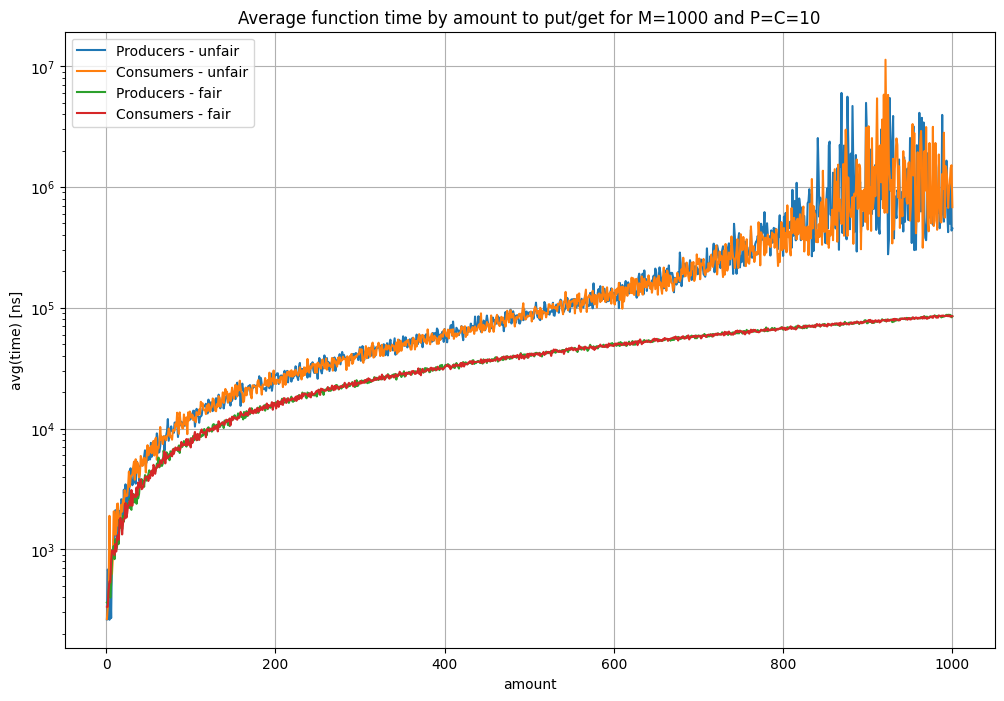

In [4]:
m = MS[0]
pc = PCS[0]
plot_results(m, pc, *get_results(m, pc))

<h3>Wykres dla M = 10 000 oraz P = C = 100</h3>

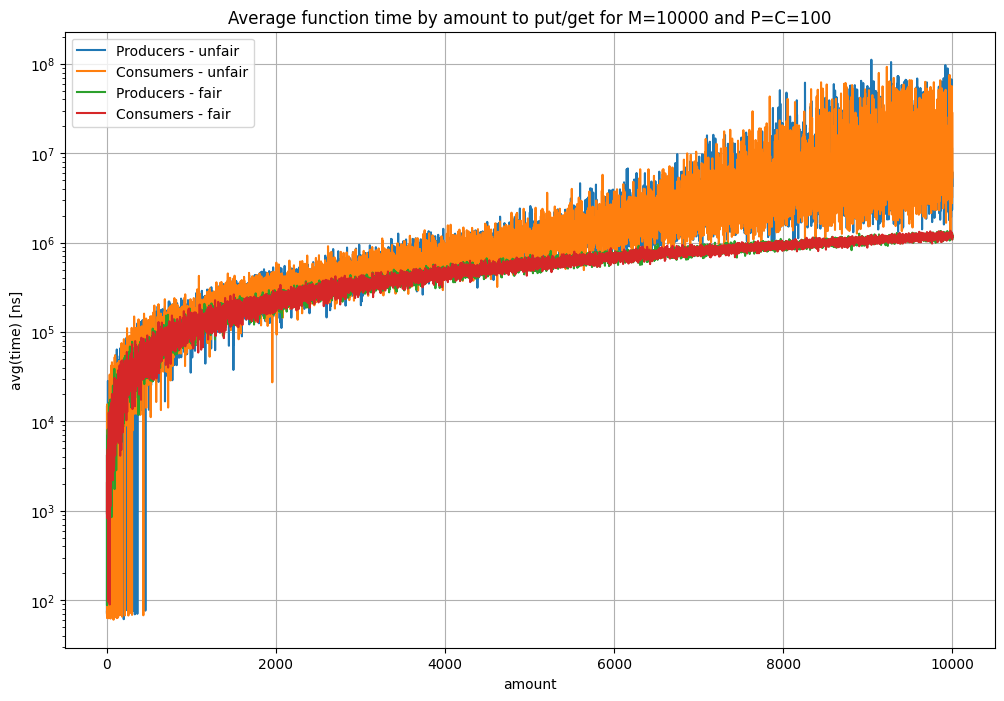

In [5]:
m = MS[1]
pc = PCS[1]
plot_results(m, pc, *get_results(m, pc))

<h3>Wykres dla M = 100 000 oraz P = C = 1000</h3>

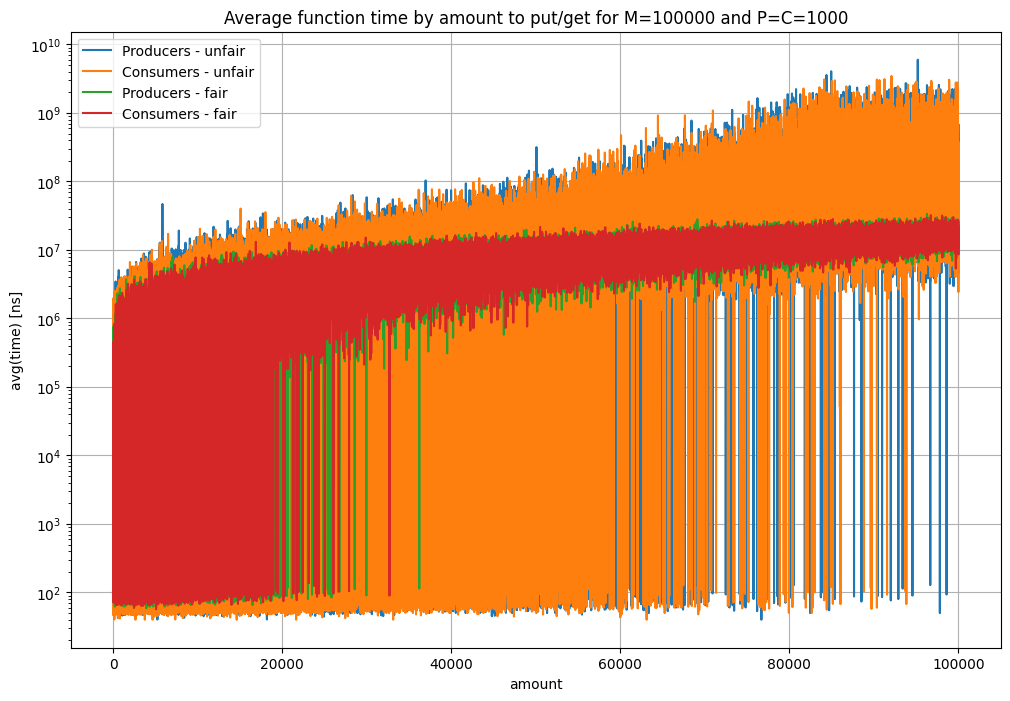

In [6]:
m = MS[2]
pc = PCS[2]
plot_results(m, pc, *get_results(m, pc))